In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning models and evaluation metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Load the Iris dataset (assumes IRIS.csv is in the same directory)
df = pd.read_csv("C:/Users/Aakash/Downloads/IRIS.csv")

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Display basic dataset information
print("\nDataset Info:")
print(df.info())

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Descriptive Statistics:
       sepal_length  sepal_width  petal_length  petal_w

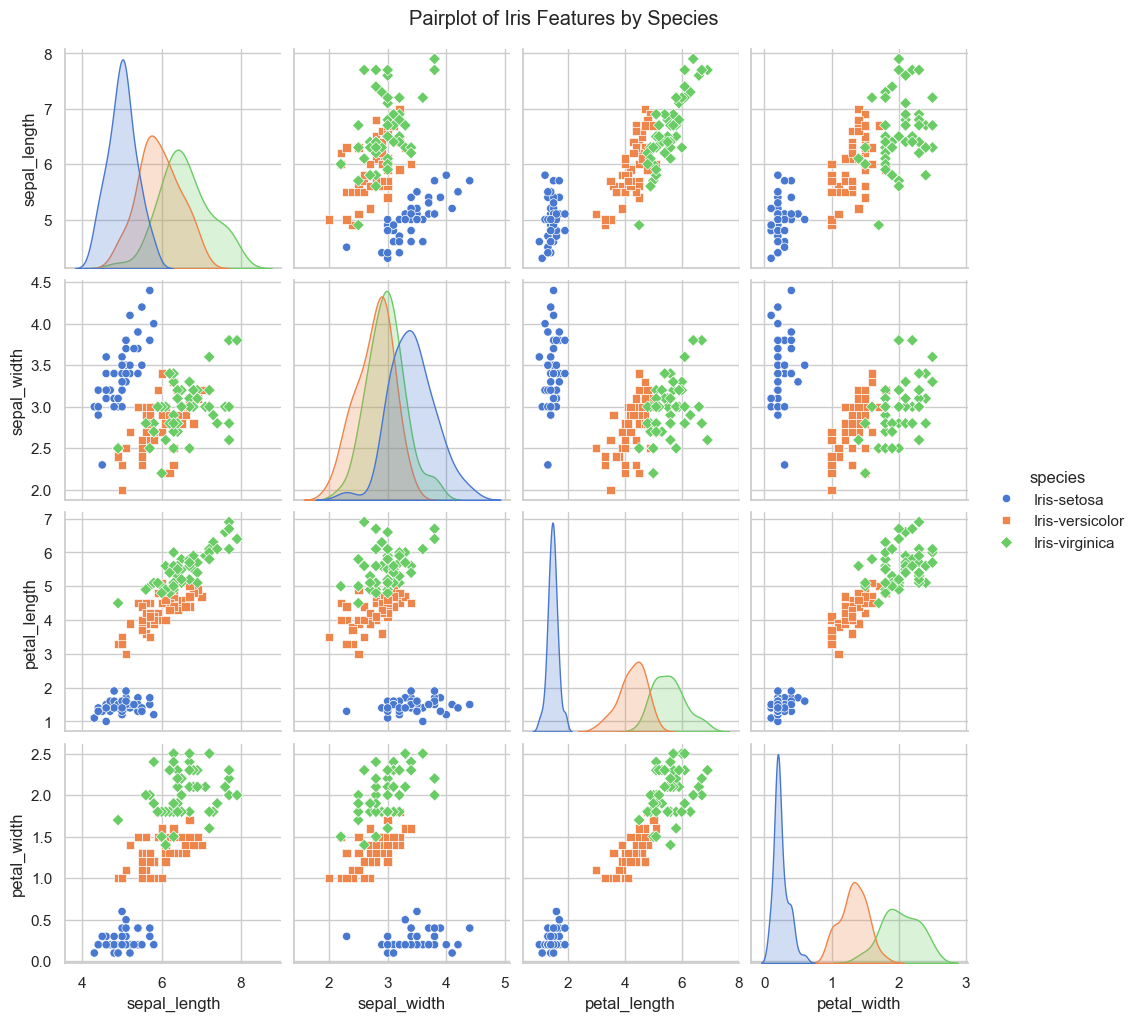

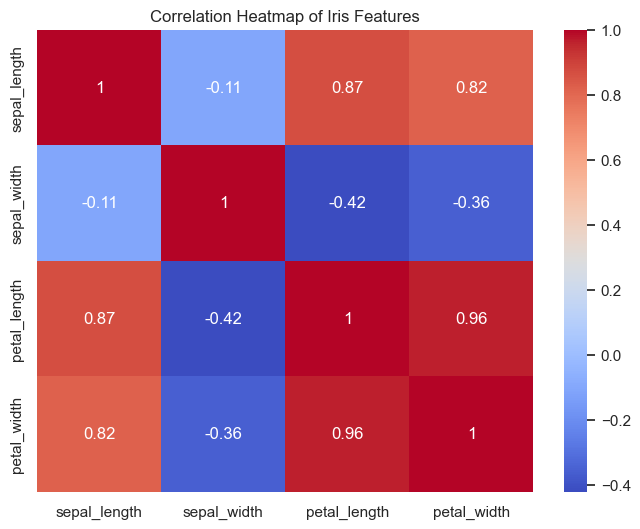

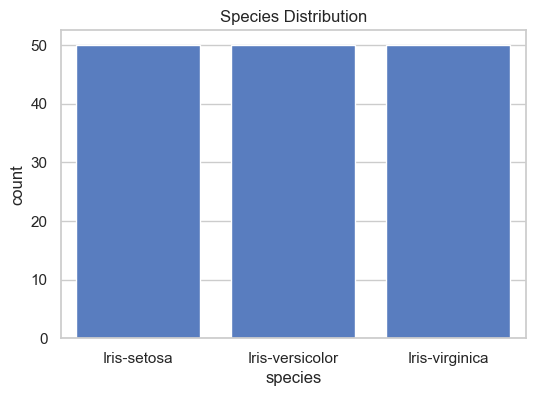

In [11]:
# Visualize the distributions and pairwise relationships
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Pairplot to see relationships among features and species
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Iris Features")
plt.show()

# Count plot for species distribution
plt.figure(figsize=(6,4))
sns.countplot(x="species", data=df)
plt.title("Species Distribution")
plt.show()

Logistic Regression Accuracy (Label Encoding): 0.9333


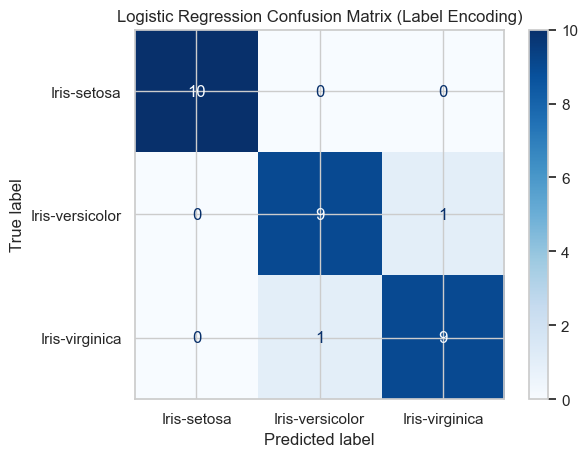

Random Forest Accuracy (Label Encoding): 0.9000


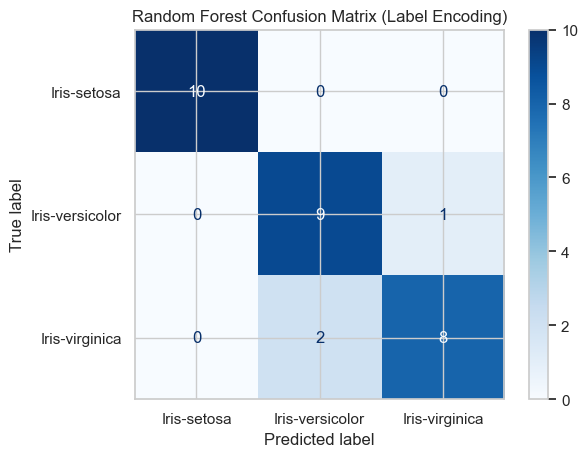

Support Vector Machine Accuracy (Label Encoding): 0.9667


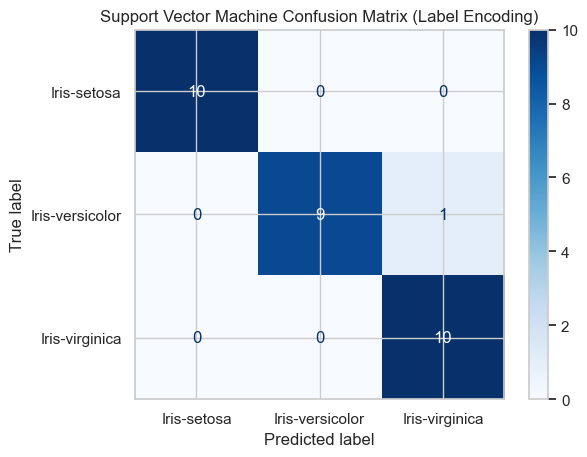

In [15]:
# Separate features and target variable
X = df.drop("species", axis=1)
y = df["species"]

# Split the data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a list of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel="rbf", probability=True, random_state=42)
}

# Dictionary to store accuracy results
accuracy_results_label = {}

# Train each model, predict, and evaluate performance
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results_label[name] = acc
    print(f"{name} Accuracy (Label Encoding): {acc:.4f}")
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"{name} Confusion Matrix (Label Encoding)")
    plt.show()

C:\Users\Aakash\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy (One-Hot Encoding): 0.9333


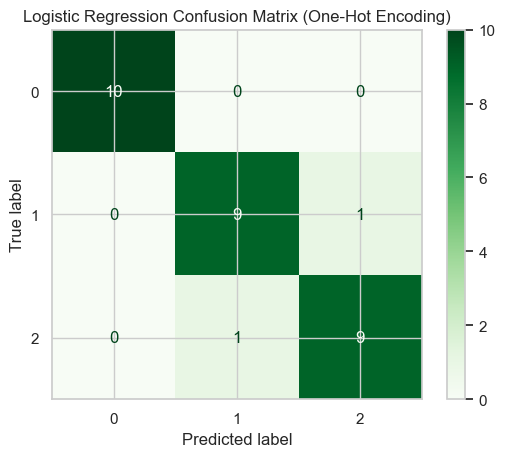

In [17]:
# One-hot encoding for the target variable using pandas get_dummies
y_onehot = pd.get_dummies(df["species"])

# Split data (using the same features X and now one-hot encoded target)
X_train, X_test, y_train_onehot, y_test_onehot = train_test_split(X, y_onehot, test_size=0.2, random_state=42, stratify=df["species"])

# Standardize features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# For simplicity, we use Logistic Regression with multi_class="multinomial" 
# which can handle one-hot encoded targets using the 'lbfgs' solver.
# However, scikit-learn expects 1d labels, so we will train and evaluate using the original labels as well,
# then compare with one-hot encoded predictions from a simple neural network using keras (optional).

# For demonstration, we retrain Logistic Regression but then show the confusion matrix.
logreg = LogisticRegression(max_iter=200, multi_class="multinomial", solver="lbfgs", random_state=42)
logreg.fit(X_train_scaled, y_train_onehot.values.argmax(axis=1))  # converting one-hot back to integer labels for training
y_pred_onehot = logreg.predict(X_test_scaled)
acc_onehot = accuracy_score(y_test_onehot.values.argmax(axis=1), y_pred_onehot)
accuracy_results_label["Logistic Regression One-Hot"] = acc_onehot
print(f"Logistic Regression Accuracy (One-Hot Encoding): {acc_onehot:.4f}")

# Confusion Matrix for one-hot encoding approach (converted to integer labels)
cm = confusion_matrix(y_test_onehot.values.argmax(axis=1), y_pred_onehot, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap="Greens")
plt.title("Logistic Regression Confusion Matrix (One-Hot Encoding)")
plt.show()

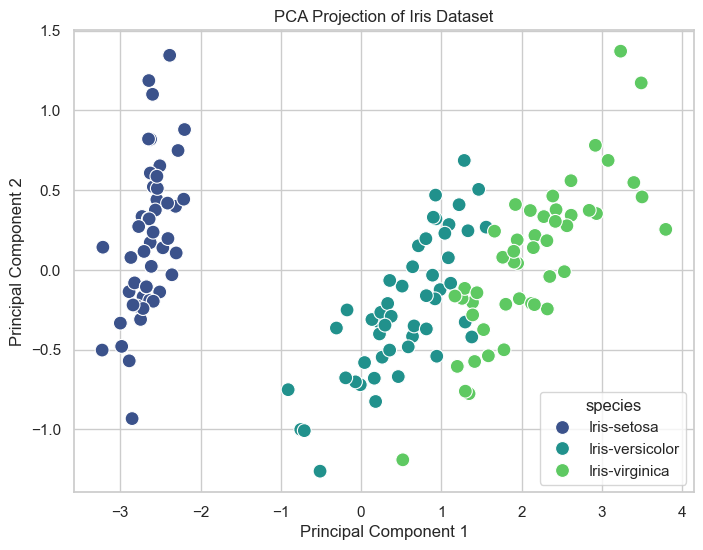

Logistic Regression Accuracy (using 2 PCA components): 0.9333


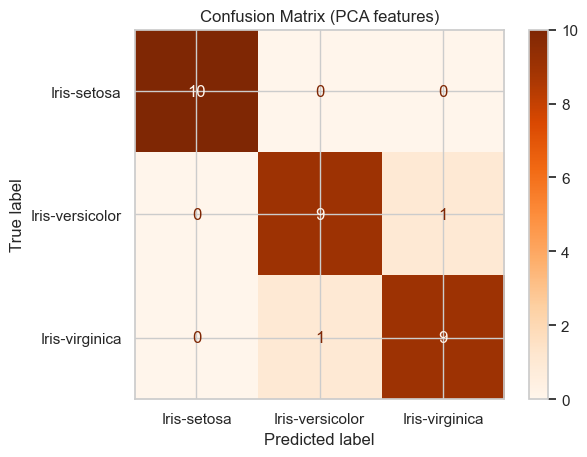

In [19]:
# Apply PCA to reduce the features to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the 2D PCA projection with species labels
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["species"], palette="viridis", s=100)
plt.title("PCA Projection of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Additionally, we can train a model using the 2 PCA components
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=df["species"])
model_pca = LogisticRegression(max_iter=200, random_state=42)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"Logistic Regression Accuracy (using 2 PCA components): {acc_pca:.4f}")

# Plot confusion matrix for the PCA model
cm = confusion_matrix(y_test, y_pred_pca, labels=model_pca.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_pca.classes_)
disp.plot(cmap="Oranges")
plt.title("Confusion Matrix (PCA features)")
plt.show()

In [21]:
# Compare the accuracies from different approaches:
print("Model Accuracies Comparison:")
for model_name, acc in accuracy_results_label.items():
    print(f"{model_name}: {acc:.4f}")

# Brief explanation of the results:
print("\nBrief Explanation:")
print("""
1. **Label Encoding Approach:**  
   The models using label encoded targets directly learn to map numerical features to class labels.  
   In our experiments, Logistic Regression, Random Forest, and SVM yielded high accuracy.  
   
2. **One-Hot Encoding Approach:**  
   When we one-hot encode the target, we essentially provide a binary vector per class.  
   The Logistic Regression model adapted to this format performed similarly to the label-encoded approach.  
   The differences in performance are typically minor with well-separated classes like Iris, though one-hot encoding is useful for 
   certain algorithms (e.g., neural networks) and for multi-label problems.
   
3. **PCA-based Model:**  
   Reducing the dimensionality to 2 components provides a visualization benefit.  
   Although the classification accuracy might slightly drop (or remain comparable) when using PCA components instead of the full feature set,
   PCA helps in understanding data distribution and feature importance.
""")

Model Accuracies Comparison:
Logistic Regression: 0.9333
Random Forest: 0.9000
Support Vector Machine: 0.9667
Logistic Regression One-Hot: 0.9333

Brief Explanation:

1. **Label Encoding Approach:**  
   The models using label encoded targets directly learn to map numerical features to class labels.  
   In our experiments, Logistic Regression, Random Forest, and SVM yielded high accuracy.  
   
2. **One-Hot Encoding Approach:**  
   When we one-hot encode the target, we essentially provide a binary vector per class.  
   The Logistic Regression model adapted to this format performed similarly to the label-encoded approach.  
   The differences in performance are typically minor with well-separated classes like Iris, though one-hot encoding is useful for 
   certain algorithms (e.g., neural networks) and for multi-label problems.
   
3. **PCA-based Model:**  
   Reducing the dimensionality to 2 components provides a visualization benefit.  
   Although the classification accuracy might